implementation:

*   https://www.kaggle.com/daisukelab/cnn-2d-basic-solution-powered-by-fast-ai
*   https://www.kaggle.com/mhiro2/simple-2d-cnn-classifier-with-pytorch

### Downloading dataset

In [1]:
!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/74.0.3729.157 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kaggle-competitions-data/kaggle/10700/371136/sample_submission.csv?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1558799884&Signature=F%2Fad1sy%2BW8St76%2B8f3hMaIuYEpIiHa1VBPcFmcbPgITtIiSu4ZDmh65EuaDJn0pD1%2FdgfCzPRhXvpREZ9KYbCHqLCN%2FBI0SrL15waLFHyIKJoBy6oR6GqmWpUj4nj8vPHE1AnkuzaTYtPU6KZWSi%2BhBv%2FR9sNkH2kChcyyjBiE8iQEO7f2isrtNXlaDEgBDy3CWMri%2FZycWwZmif3m8%2Br5DsX5EnabMRJiH2fiDidpcu4irs%2B8YPKgticTKbZT4ryN2I5I6%2BgSoNJuGLErtomCRQztt6F4Vcm1q%2BOpkAiwf5Aub8v9%2BNeHpL6ZBcbAKt1H1gKaZ3xiV2Zt8EnTMgfA%3D%3D" -O "sample_submission.csv" -c

--2019-05-24 13:44:23--  https://storage.googleapis.com/kaggle-competitions-data/kaggle/10700/371136/sample_submission.csv?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1558799884&Signature=F%2Fad1sy%2BW8St76%2B8f3hMaIuYEpIiHa1VBPcFmcbPgITtIiSu4ZDmh65EuaDJn0pD1%2FdgfCzPRhXvpREZ9KYbCHqLCN%2FBI0SrL15waLFHyIKJoBy6oR6GqmWpUj4nj8vPHE1AnkuzaTYtPU6KZWSi%2BhBv%2FR9sNkH2kChcyyjBiE8iQEO7f2isrtNXlaDEgBDy3CWMri%2FZycWwZmif3m8%2Br5DsX5EnabMRJiH2fiDidpcu4irs%2B8YPKgticTKbZT4ryN2I5I6%2BgSoNJuGLErtomCRQztt6F4Vcm1q%2BOpkAiwf5Aub8v9%2BNeHpL6ZBcbAKt1H1gKaZ3xiV2Zt8EnTMgfA%3D%3D
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.141.128, 2607:f8b0:400c:c06::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 194835 (190K) [text/csv]
Saving to: ‘sample_submission.csv’

sample_submission.c 100%[===================>] 190.27K  --.-KB/s    in 0.002s  

2019-05-24 13:44:2

In [2]:
!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/74.0.3729.157 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kaggle-competitions-data/kaggle/10700/371136/train_curated.csv?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1558799898&Signature=itj45RttdpUSnrbNk7ROVmQpBtkQKF%2Fn3vVS88UGduDi4u1KU7ZdKRt0CAfWYHDlmgc15KanVoEBELntnJDIePohCWdnFF5LEP18%2BBeJ9LuwQ3sDBJJEbRfwrAbcgbasyhGE%2Fw8qFakqsDVEHvaag0jDXUWg8Cg8thBMDERX6Enu%2FI4Obn18LvPlhkg5FhQfQsVcdXxdFKHx869eGq34TnYhlvuAKsOZo5LesF6FeAK3G80GHhVA9B78uSwEziLrhgagWXm%2Fp3wpg%2Fsnpu5TJed%2FJjLiwoguExOx%2Fcws9xWTubKrF4rgb6X5FD3bIV5b8H1rwyWg%2FU8v%2BDkDH4dxqQ%3D%3D" -O "train_curated.csv" -c

--2019-05-24 13:44:25--  https://storage.googleapis.com/kaggle-competitions-data/kaggle/10700/371136/train_curated.csv?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1558799898&Signature=itj45RttdpUSnrbNk7ROVmQpBtkQKF%2Fn3vVS88UGduDi4u1KU7ZdKRt0CAfWYHDlmgc15KanVoEBELntnJDIePohCWdnFF5LEP18%2BBeJ9LuwQ3sDBJJEbRfwrAbcgbasyhGE%2Fw8qFakqsDVEHvaag0jDXUWg8Cg8thBMDERX6Enu%2FI4Obn18LvPlhkg5FhQfQsVcdXxdFKHx869eGq34TnYhlvuAKsOZo5LesF6FeAK3G80GHhVA9B78uSwEziLrhgagWXm%2Fp3wpg%2Fsnpu5TJed%2FJjLiwoguExOx%2Fcws9xWTubKrF4rgb6X5FD3bIV5b8H1rwyWg%2FU8v%2BDkDH4dxqQ%3D%3D
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.141.128, 2607:f8b0:400c:c06::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 143137 (140K) [text/csv]
Saving to: ‘train_curated.csv’

train_curated.csv   100%[===================>] 139.78K  --.-KB/s    in 0.001s  

2019-05-24 13:44:25 (112 MB/s) -

In [3]:
!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/74.0.3729.157 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kaggle-competitions-data/kaggle/10700/371136/train_noisy.csv?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1558799913&Signature=ZlFh6cVQTqy%2BPNv1uwmiZJLurcQnzng%2BX3lxN%2FLzGbIwm%2B5npT%2Bznr4kSV%2FGUdT3FA9qIXkX%2BkKE4nGkp4Ex8hi%2FLWF1mSr56DvCv8lrHH4d8HanHUVJH6hMIR8d40gejokfnEIF67ocNS02CZFKxRQYSetxjvJDAHNfQbsL1pdYpXMljPPr2a%2F6zjbXH%2B5VY5mIK669yTGiquXpsrLM%2Bnnas0o22ZZQGnkwL7hCWUcC7W48zSIMJUriNPWlQrjZyPJNs26O6XpibtqtQqbUg5j7SOGHQBpF7X8osQWDisnfpMe65MZbaiGtQ4nr5OAg%2FWdnrPbSIU6StrF2iSNBeg%3D%3D" -O "train_noisy.csv" -c

--2019-05-24 13:44:28--  https://storage.googleapis.com/kaggle-competitions-data/kaggle/10700/371136/train_noisy.csv?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1558799913&Signature=ZlFh6cVQTqy%2BPNv1uwmiZJLurcQnzng%2BX3lxN%2FLzGbIwm%2B5npT%2Bznr4kSV%2FGUdT3FA9qIXkX%2BkKE4nGkp4Ex8hi%2FLWF1mSr56DvCv8lrHH4d8HanHUVJH6hMIR8d40gejokfnEIF67ocNS02CZFKxRQYSetxjvJDAHNfQbsL1pdYpXMljPPr2a%2F6zjbXH%2B5VY5mIK669yTGiquXpsrLM%2Bnnas0o22ZZQGnkwL7hCWUcC7W48zSIMJUriNPWlQrjZyPJNs26O6XpibtqtQqbUg5j7SOGHQBpF7X8osQWDisnfpMe65MZbaiGtQ4nr5OAg%2FWdnrPbSIU6StrF2iSNBeg%3D%3D
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.141.128, 2607:f8b0:400c:c06::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 584806 (571K) [text/csv]
Saving to: ‘train_noisy.csv’

train_noisy.csv     100%[===================>] 571.10K  --.-KB/s    in 0.005s  

2019-05-24 13:44:28 (112 MB/s) -

In [4]:
!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/74.0.3729.157 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kaggle-competitions-data/kaggle/10700/371136/test.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1558799927&Signature=J0YpYkbuS5khWnMdmZ8UIj7L41o8S5%2BmANIZJKJz5HIWj8s7d9M34m%2B6Tc6E3BjhGDefza2%2FWlCj1wJKX4ECVI5S%2B%2F%2FTJGniSWaJnHt6874peKSFRsyk%2FfOSaMsuyNpPWe%2FrmrBHZ%2FVj0HaZlhXlW5%2BLXfi9p7L%2F3zs1yy1Xu%2BQ5ZrEHDn3kQ1gbN1mJ03cXG0qA%2BUCQLlq0ZTi465fp%2BaJAqWTH7qnMmej%2BHt9zCmdl1VBj0wb04YDIjiLaTP%2BdS7tmqOMczjT1a9lZJeEKgwNSdGCWueHTseu0AKWywk6svh1Q0vo4qEoA21%2F0V%2FKi6I6CMAsKaZowVd2VxRsRfQ%3D%3D" -O "test.zip" -c

--2019-05-24 13:44:30--  https://storage.googleapis.com/kaggle-competitions-data/kaggle/10700/371136/test.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1558799927&Signature=J0YpYkbuS5khWnMdmZ8UIj7L41o8S5%2BmANIZJKJz5HIWj8s7d9M34m%2B6Tc6E3BjhGDefza2%2FWlCj1wJKX4ECVI5S%2B%2F%2FTJGniSWaJnHt6874peKSFRsyk%2FfOSaMsuyNpPWe%2FrmrBHZ%2FVj0HaZlhXlW5%2BLXfi9p7L%2F3zs1yy1Xu%2BQ5ZrEHDn3kQ1gbN1mJ03cXG0qA%2BUCQLlq0ZTi465fp%2BaJAqWTH7qnMmej%2BHt9zCmdl1VBj0wb04YDIjiLaTP%2BdS7tmqOMczjT1a9lZJeEKgwNSdGCWueHTseu0AKWywk6svh1Q0vo4qEoA21%2F0V%2FKi6I6CMAsKaZowVd2VxRsRfQ%3D%3D
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.141.128, 2607:f8b0:400c:c06::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 698756070 (666M) [application/zip]
Saving to: ‘test.zip’

test.zip            100%[===================>] 666.38M   189MB/s    in 3.5s    

2019-05-24 13:44:34 (189

In [5]:
!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/74.0.3729.157 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kaggle-competitions-data/kaggle/10700/371136/train_curated.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1558799942&Signature=LVCIgYhouKvt3sMbZcmRZQz92zjnwvPzz%2BiQXHnatRXMp2bkXoBapAqSHtawEGG7m1JUG4dCDiAsG6A6jNoW8PaII7AYXsCJuIaQaMjAH%2FE6wFfy5h27xprzDwsZykE6q1Vtq3NxfjwGqqMXDCqtjy%2Fjsov4cbrCGXNzZwtHF%2BxKenJEidwX4VGchNFu57CgsjgHQU4aHAGisS0P8AEPahgjgKWs4OOQY4PGs06y9nOsZzzbWFjWf4W8X41loL%2BAmC41brArHoak0DzSsTdT33E7%2BKPDhMt4YkSx%2B8sDsEVtOkZJbARglHXOhE%2BaQC7G%2Fkm5mB8E0X03BK%2FAfo1Xtg%3D%3D" -O "train_curated.zip" -c

--2019-05-24 13:44:36--  https://storage.googleapis.com/kaggle-competitions-data/kaggle/10700/371136/train_curated.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1558799942&Signature=LVCIgYhouKvt3sMbZcmRZQz92zjnwvPzz%2BiQXHnatRXMp2bkXoBapAqSHtawEGG7m1JUG4dCDiAsG6A6jNoW8PaII7AYXsCJuIaQaMjAH%2FE6wFfy5h27xprzDwsZykE6q1Vtq3NxfjwGqqMXDCqtjy%2Fjsov4cbrCGXNzZwtHF%2BxKenJEidwX4VGchNFu57CgsjgHQU4aHAGisS0P8AEPahgjgKWs4OOQY4PGs06y9nOsZzzbWFjWf4W8X41loL%2BAmC41brArHoak0DzSsTdT33E7%2BKPDhMt4YkSx%2B8sDsEVtOkZJbARglHXOhE%2BaQC7G%2Fkm5mB8E0X03BK%2FAfo1Xtg%3D%3D
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.141.128, 2607:f8b0:400c:c06::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2406491583 (2.2G) [application/zip]
Saving to: ‘train_curated.zip’

train_curated.zip   100%[===================>]   2.24G   115MB/s    in 18s     

2019-05-24 13:44:54 (

In [6]:
!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/74.0.3729.157 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kaggle-competitions-data/kaggle/10700/371136/train_noisy.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1558799956&Signature=jyuoEtStXkt2fo1jBOxMVWmHmM03wkEcYA4a7jXDnp4w%2FXYomsje6uDv4rbeUl2UDpNbCHAwraU4zgTH9YxUVqmYrFBf9INd9Eqyq%2B8J4R%2F8PuPbx5yNLntlqPULq2iP4kn315DTkInPpGpACUgnhVZsdcGMAaHLYI8Gk4drcECT0NghIxTtqpJ6pQ3zBvDTKmwqi%2Fe8cqMvvH3fY21IBVHmnDqmMB0Cbeoo9D3Y7HMSyQvMGCmQ97Mve%2FI%2Bhirs7Qqed1ftzcnxFwpbr6ALZExZNVt7keVjlEIdVhP1%2B14HhsCIhBSYa8FUQjCpbzoniYTJm5Pd31wxXpRYViPQ2A%3D%3D" -O "train_noisy.zip" -c

--2019-05-24 13:44:56--  https://storage.googleapis.com/kaggle-competitions-data/kaggle/10700/371136/train_noisy.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1558799956&Signature=jyuoEtStXkt2fo1jBOxMVWmHmM03wkEcYA4a7jXDnp4w%2FXYomsje6uDv4rbeUl2UDpNbCHAwraU4zgTH9YxUVqmYrFBf9INd9Eqyq%2B8J4R%2F8PuPbx5yNLntlqPULq2iP4kn315DTkInPpGpACUgnhVZsdcGMAaHLYI8Gk4drcECT0NghIxTtqpJ6pQ3zBvDTKmwqi%2Fe8cqMvvH3fY21IBVHmnDqmMB0Cbeoo9D3Y7HMSyQvMGCmQ97Mve%2FI%2Bhirs7Qqed1ftzcnxFwpbr6ALZExZNVt7keVjlEIdVhP1%2B14HhsCIhBSYa8FUQjCpbzoniYTJm5Pd31wxXpRYViPQ2A%3D%3D
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.141.128, 2607:f8b0:400c:c06::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21504922116 (20G) [application/zip]
Saving to: ‘train_noisy.zip’

train_noisy.zip     100%[===================>]  20.03G   156MB/s    in 2m 32s  

2019-05-24 13:47:28 (135 MB/s) 

***Preprocessed data***

In [7]:
!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/74.0.3729.157 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kaggle-datasets/164278/379726/fat2019_prep_mels1.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1558799978&Signature=EAt70QU2usekkPy74aSvqhN4f7o7pxx%2BHPUY5NgZ9m%2FxEsoOpQsV7R0lJLDoc%2BQ9eenQl8BN3ZF7sHHax07TCxE6zYU1pqLxi0F%2BAshQWT2Fswsi%2B5Lrdeb%2FVCeiBrknI5upPS3kYNgaGiLWbd76vu8SRnO092Wbvo9nKCqqJjSz0fSI7%2BVHPH8xb9MbtV1bkiYCkHwnZTOXJQNffAOHzC9aXIVu5wG0wWKly7iokVU2oKJE23a8QfE%2BjhRgbC3KHeMks0uPD95WtGdHYIW8JDrnejTEHNyApGq8JPS8dM2zq0wW1xteFotawF%2FLS32msixYHCJeCDTbfClvpYgkgA%3D%3D" -O "fat2019_prep_mels1.zip" -c

--2019-05-24 13:47:31--  https://storage.googleapis.com/kaggle-datasets/164278/379726/fat2019_prep_mels1.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1558799978&Signature=EAt70QU2usekkPy74aSvqhN4f7o7pxx%2BHPUY5NgZ9m%2FxEsoOpQsV7R0lJLDoc%2BQ9eenQl8BN3ZF7sHHax07TCxE6zYU1pqLxi0F%2BAshQWT2Fswsi%2B5Lrdeb%2FVCeiBrknI5upPS3kYNgaGiLWbd76vu8SRnO092Wbvo9nKCqqJjSz0fSI7%2BVHPH8xb9MbtV1bkiYCkHwnZTOXJQNffAOHzC9aXIVu5wG0wWKly7iokVU2oKJE23a8QfE%2BjhRgbC3KHeMks0uPD95WtGdHYIW8JDrnejTEHNyApGq8JPS8dM2zq0wW1xteFotawF%2FLS32msixYHCJeCDTbfClvpYgkgA%3D%3D
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.141.128, 2607:f8b0:400c:c06::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2865032102 (2.7G) [application/zip]
Saving to: ‘fat2019_prep_mels1.zip’

fat2019_prep_mels1. 100%[===================>]   2.67G   136MB/s    in 22s     

2019-05-24 13:47:53 (124 MB/

### Exploring dataset

In [0]:
!mkdir test
!mkdir train_curated
!mkdir train_noisy
!mkdir data

In [0]:
!unzip -qq fat2019_prep_mels1.zip -d data

In [0]:
!unzip -qq test.zip -d test

In [0]:
!unzip -qq train_curated.zip -d train_curated

In [0]:
!unzip -qq train_noisy.zip -d train_noisy

To apply deep learning technique, we first have to come up with a way to provide effective converse from audio data to any other form which will make it effective for deep learning technique for multilabeling

Audio conversion to 2D
Almost copyed from my repository: https://github.com/daisukelab/ml-sound-classifier

Handle sampling rate 44.1kHz as is, no information loss.
Size of each file will be 128 x L, L is audio seconds x 128; [128, 256] if sound is 2s long.
Convert to Mel-spectrogram, not MFCC. We are handling general sound rather than human voice. https://en.wikipedia.org/wiki/Spectrogram

In [0]:
!mv -t data test train_curated train_noisy

In [0]:
!mv sample_submission.csv train_curated.csv train_noisy.csv data

In [15]:
!ls data

mels_test.pkl		    sample_submission.csv  train_noisy
mels_train_curated.pkl	    test		   train_noisy.csv
mels_train_noisy.pkl	    train_curated	   trn_noisy_best50s.csv
mels_trn_noisy_best50s.pkl  train_curated.csv


## Testing different dL techniques

### End-2-End pipeline

In [0]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
# getting data and creating dataset; dataloaders
with open('data/mels_train_curated.pkl', 'rb') as curated:
  x_train = pickle.load(curated)
  
len(x_train)

4970

In [19]:
train_curated = pd.read_csv('data/train_curated.csv')
train_curated.head()

,fname,labels
0,0006ae4e.wav,Bark
1,0019ef41.wav,Raindrop
2,001ec0ad.wav,Finger_snapping
3,0026c7cb.wav,Run
4,0026f116.wav,Finger_snapping


In [21]:
test_df = pd.read_csv('data/sample_submission.csv')
test_df.head()

,fname,Accelerating_and_revving_and_vroom,Accordion,Acoustic_guitar,Applause,Bark,Bass_drum,Bass_guitar,Bathtub_(filling_or_washing),Bicycle_bell,Burping_and_eructation,Bus,Buzz,Car_passing_by,Cheering,Chewing_and_mastication,Child_speech_and_kid_speaking,Chink_and_clink,Chirp_and_tweet,Church_bell,Clapping,Computer_keyboard,Crackle,Cricket,Crowd,Cupboard_open_or_close,Cutlery_and_silverware,Dishes_and_pots_and_pans,Drawer_open_or_close,Drip,Electric_guitar,Fart,Female_singing,Female_speech_and_woman_speaking,Fill_(with_liquid),Finger_snapping,Frying_(food),Gasp,Glockenspiel,Gong,...,Harmonica,Hi-hat,Hiss,Keys_jangling,Knock,Male_singing,Male_speech_and_man_speaking,Marimba_and_xylophone,Mechanical_fan,Meow,Microwave_oven,Motorcycle,Printer,Purr,Race_car_and_auto_racing,Raindrop,Run,Scissors,Screaming,Shatter,Sigh,Sink_(filling_or_washing),Skateboard,Slam,Sneeze,Squeak,Stream,Strum,Tap,Tick-tock,Toilet_flush,Traffic_noise_and_roadway_noise,Trickle_and_dribble,Walk_and_footsteps,Water_tap_and_faucet,Waves_and_surf,Whispering,Writing,Yell,Zipper_(clothing)
0,000ccb97.wav,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0012633b.wav,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,001ed5f1.wav,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,00294be0.wav,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,003fde7a.wav,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [22]:
labels = test_df.columns[1:].tolist()
labels

['Accelerating_and_revving_and_vroom',
 'Accordion',
 'Acoustic_guitar',
 'Applause',
 'Bark',
 'Bass_drum',
 'Bass_guitar',
 'Bathtub_(filling_or_washing)',
 'Bicycle_bell',
 'Burping_and_eructation',
 'Bus',
 'Buzz',
 'Car_passing_by',
 'Cheering',
 'Chewing_and_mastication',
 'Child_speech_and_kid_speaking',
 'Chink_and_clink',
 'Chirp_and_tweet',
 'Church_bell',
 'Clapping',
 'Computer_keyboard',
 'Crackle',
 'Cricket',
 'Crowd',
 'Cupboard_open_or_close',
 'Cutlery_and_silverware',
 'Dishes_and_pots_and_pans',
 'Drawer_open_or_close',
 'Drip',
 'Electric_guitar',
 'Fart',
 'Female_singing',
 'Female_speech_and_woman_speaking',
 'Fill_(with_liquid)',
 'Finger_snapping',
 'Frying_(food)',
 'Gasp',
 'Glockenspiel',
 'Gong',
 'Gurgling',
 'Harmonica',
 'Hi-hat',
 'Hiss',
 'Keys_jangling',
 'Knock',
 'Male_singing',
 'Male_speech_and_man_speaking',
 'Marimba_and_xylophone',
 'Mechanical_fan',
 'Meow',
 'Microwave_oven',
 'Motorcycle',
 'Printer',
 'Purr',
 'Race_car_and_auto_racing',
 

In [23]:
num_classes = len(labels)
num_classes

80

In [24]:
y_train = np.zeros((len(train_curated), num_classes)).astype(int)
for i, row in enumerate(train_curated['labels'].str.split(',')):
  for label in row:
    idx = labels.index(label)
    y_train[i, idx] = 1
    
y_train.shape

(4970, 80)

In [25]:
x_train


[array([[[ 89,  89,  89],
         [ 94,  94,  94],
         [117, 117, 117],
         ...,
         [127, 127, 127],
         [123, 123, 123],
         [ 87,  87,  87]],
 
        [[ 85,  85,  85],
         [100, 100, 100],
         [117, 117, 117],
         ...,
         [109, 109, 109],
         [100, 100, 100],
         [ 65,  65,  65]],
 
        [[ 77,  77,  77],
         [ 91,  91,  91],
         [ 93,  93,  93],
         ...,
         [ 81,  81,  81],
         [ 71,  71,  71],
         [ 54,  54,  54]],
 
        ...,
 
        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],
 
        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],
 
        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
  

In [26]:
y_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

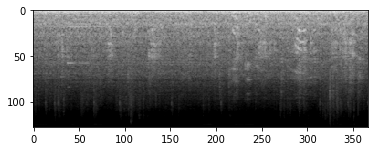

In [28]:
plt.imshow(x_train[47])

In [29]:
x_train[0].shape

(128, 448, 3)

In [47]:
image.size

(448, 128)

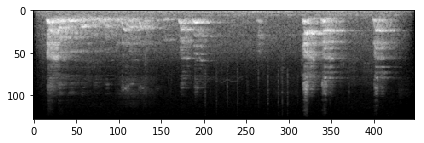

In [49]:
import skimage
skimage.io.imshow(x_train[0])

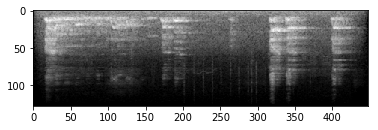

In [32]:
image = Image.fromarray(x_train[0], mode='RGB')
plt.imshow(image)

In [0]:
class traindataset(Dataset):
  def __init__(self, x_train, y_train, transforms=None):
    self.images = x_train
    self.labels = y_train
    self.transforms = transforms
    
  def __len__(self):
    return len(self.images)
  
  def __getitem__(self, index):
    image = Image.fromarray(self.images[index], mode='RGB')        
    time_dim, base_dim = image.size
    crop = random.randint(0, time_dim - base_dim)
    image = image.crop([crop, 0, crop + base_dim, base_dim])
    #image = self.transforms(image).div_(255)
    labels = self.labels[index]
    sample = {'image': image, 'labels':labels}
    
    if self.transforms:
      sample = self.transforms(sample)
      
    return sample

0 (128, 128) 80
1 (128, 128) 80
2 (128, 128) 80
3 (128, 128) 80


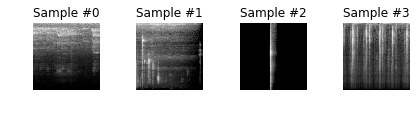

In [92]:
fat_dataset = traindataset(x_train, y_train)

fig = plt.figure()

for i in range(len(fat_dataset)):
  sample = fat_dataset[i]
  print(i, sample['image'].size, sample['labels'].size)

  ax = plt.subplot(1, 4, i+1)
  plt.tight_layout()
  ax.set_title('Sample #{}'.format(i))
  ax.axis('off')
  plt.imshow(sample['image'])
  
  if i == 3:
    plt.show()
    break

In [0]:
class Rescale(object):
    """Rescale the image in a sample to a given size.

    Args:
        output_size (tuple or int): Desired output size. If tuple, output is
            matched to output_size. If int, smaller of image edges is matched
            to output_size keeping aspect ratio the same.
    """

    def __init__(self, output_size):
        assert isinstance(output_size, (int, tuple))
        self.output_size = output_size

    def __call__(self, sample):
        image, labels = sample['image'], sample['labels']

        h, w = image.size
        if isinstance(self.output_size, int):
            if h > w:
                new_h, new_w = self.output_size * h / w, self.output_size
            else:
                new_h, new_w = self.output_size, self.output_size * w / h
        else:
            new_h, new_w = self.output_size

        new_h, new_w = int(new_h), int(new_w)

        img = transform.resize(image, (new_h, new_w))

        # h and w are swapped for landmarks because for images,
        # x and y axes are axis 1 and 0 respectively
        #landmarks = landmarks * [new_w / w, new_h / h]

        return {'image': img, 'labels': labels}


class RandomCrop(object):
    """Crop randomly the image in a sample.

    Args:
        output_size (tuple or int): Desired output size. If int, square crop
            is made.
    """

    def __init__(self, output_size):
        assert isinstance(output_size, (int, tuple))
        if isinstance(output_size, int):
            self.output_size = (output_size, output_size)
        else:
            assert len(output_size) == 2
            self.output_size = output_size

    def __call__(self, sample):
        image, labels = sample['image'], sample['labels']

        h, w = image.size
        new_h, new_w = self.output_size

        top = np.random.randint(0, h - new_h)
        left = np.random.randint(0, w - new_w)

        image = image[top: top + new_h,
                      left: left + new_w]

        #landmarks = landmarks - [left, top]

        return {'image': image, 'labels': labels}


class ToTensor(object):
    """Convert ndarrays in sample to Tensors."""

    def __call__(self, sample):
        image, labels = sample['labels'], sample['labels']

        # swap color axis because
        # numpy image: H x W x C
        # torch image: C X H X W
        image = image.transpose((2, 0, 1))
        return {'image': torch.from_numpy(image),
                'labels': torch.from_numpy(labels)}

In [94]:
#don't know why it doesn't work?
scale = Rescale(128)
crop = RandomCrop(112)
composed = transforms.Compose([Rescale(128),
                               RandomCrop(112)])

# Apply each of the above transforms on sample.
fig = plt.figure()
sample = fat_dataset[0]
image = sample['image']
for i, tsfrm in enumerate([scale, crop, composed]):
    transformed_sample = tsfrm(image)

    ax = plt.subplot(1, 3, i + 1)
    plt.tight_layout()
    ax.set_title(type(tsfrm).__name__)
    plt.imshow(transformed_sample)
    
plt.show()

TypeError: ignored

<Figure size 432x288 with 0 Axes>

In [96]:
transformed_dataset = traindataset(x_train,
                                  y_train,
                                  transforms=transforms.Compose([
                                               Rescale(128),
                                               RandomCrop(112),
                                               ToTensor()
                                           ]))

for i in range(len(transformed_dataset)):
    sample = transformed_dataset[i]

    print(i, sample['image'].size(), sample['labels'].size())

    if i == 3:
        break

AttributeError: ignored

In [97]:
image = Image.fromarray(np.uint8(cm.gist_earth(x_train[0])*255))
image.size

NameError: ignored

### 2. Pytorch

***Simple changes, significant improvement in lb***

Now with different convolution architecture

***Original***

In [0]:
import gc
import os
import pickle
import random
import time
from collections import Counter, defaultdict
from functools import partial
from pathlib import Path
from psutil import cpu_count

import librosa
import numpy as np
import pandas as pd
from PIL import Image
from sklearn.model_selection import train_test_split
#from skmultilearn.model_selection import iterative_train_test_split

import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, models, transforms
from torch.nn.utils import clip_grad_norm_, clip_grad_value_
from torch.utils.data.sampler import SubsetRandomSampler
import torchvision
import torchvision.transforms as transforms
import torchvision.models as models

from fastprogress import master_bar, progress_bar
from torch.optim import Adam
from torch.optim.lr_scheduler import CosineAnnealingLR
from torch.utils.data import Dataset, DataLoader
from torchvision.transforms import transforms


from tqdm import tqdm_notebook
from shutil import copyfile
import os
import math
import pickle
import numpy as np
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt

import PIL
from PIL import Image
from collections import Counter

In [0]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True

SEED = 520
seed_everything(SEED)

In [0]:
N_JOBS = cpu_count()
os.environ['MKL_NUM_THREADS'] = str(N_JOBS)
os.environ['OMP_NUM_THREADS'] = str(N_JOBS)
DataLoader = partial(DataLoader, num_workers=N_JOBS)

In [0]:
# from official code https://colab.research.google.com/drive/1AgPdhSp7ttY18O3fEoHOQKlt_3HJDLi8#scrollTo=cRCaCIb9oguU
def _one_sample_positive_class_precisions(scores, truth):
    """Calculate precisions for each true class for a single sample.

    Args:
      scores: np.array of (num_classes,) giving the individual classifier scores.
      truth: np.array of (num_classes,) bools indicating which classes are true.

    Returns:
      pos_class_indices: np.array of indices of the true classes for this sample.
      pos_class_precisions: np.array of precisions corresponding to each of those
        classes.
    """
    num_classes = scores.shape[0]
    pos_class_indices = np.flatnonzero(truth > 0)
    # Only calculate precisions if there are some true classes.
    if not len(pos_class_indices):
        return pos_class_indices, np.zeros(0)
    # Retrieval list of classes for this sample.
    retrieved_classes = np.argsort(scores)[::-1]
    # class_rankings[top_scoring_class_index] == 0 etc.
    class_rankings = np.zeros(num_classes, dtype=np.int)
    class_rankings[retrieved_classes] = range(num_classes)
    # Which of these is a true label?
    retrieved_class_true = np.zeros(num_classes, dtype=np.bool)
    retrieved_class_true[class_rankings[pos_class_indices]] = True
    # Num hits for every truncated retrieval list.
    retrieved_cumulative_hits = np.cumsum(retrieved_class_true)
    # Precision of retrieval list truncated at each hit, in order of pos_labels.
    precision_at_hits = (
            retrieved_cumulative_hits[class_rankings[pos_class_indices]] /
            (1 + class_rankings[pos_class_indices].astype(np.float)))
    return pos_class_indices, precision_at_hits


def calculate_per_class_lwlrap(truth, scores):
    """Calculate label-weighted label-ranking average precision.

    Arguments:
      truth: np.array of (num_samples, num_classes) giving boolean ground-truth
        of presence of that class in that sample.
      scores: np.array of (num_samples, num_classes) giving the classifier-under-
        test's real-valued score for each class for each sample.

    Returns:
      per_class_lwlrap: np.array of (num_classes,) giving the lwlrap for each
        class.
      weight_per_class: np.array of (num_classes,) giving the prior of each
        class within the truth labels.  Then the overall unbalanced lwlrap is
        simply np.sum(per_class_lwlrap * weight_per_class)
    """
    assert truth.shape == scores.shape
    num_samples, num_classes = scores.shape
    # Space to store a distinct precision value for each class on each sample.
    # Only the classes that are true for each sample will be filled in.
    precisions_for_samples_by_classes = np.zeros((num_samples, num_classes))
    for sample_num in range(num_samples):
        pos_class_indices, precision_at_hits = (
            _one_sample_positive_class_precisions(scores[sample_num, :],
                                                  truth[sample_num, :]))
        precisions_for_samples_by_classes[sample_num, pos_class_indices] = (
            precision_at_hits)
    labels_per_class = np.sum(truth > 0, axis=0)
    weight_per_class = labels_per_class / float(np.sum(labels_per_class))
    # Form average of each column, i.e. all the precisions assigned to labels in
    # a particular class.
    per_class_lwlrap = (np.sum(precisions_for_samples_by_classes, axis=0) /
                        np.maximum(1, labels_per_class))
    # overall_lwlrap = simple average of all the actual per-class, per-sample precisions
    #                = np.sum(precisions_for_samples_by_classes) / np.sum(precisions_for_samples_by_classes > 0)
    #           also = weighted mean of per-class lwlraps, weighted by class label prior across samples
    #                = np.sum(per_class_lwlrap * weight_per_class)
    return per_class_lwlrap, weight_per_class

In [0]:
dataset_dir = Path('data')
preprocessed_dir = Path('data')

In [0]:
csvs = {
    'train_curated': dataset_dir / 'train_curated.csv',
    #'train_noisy': dataset_dir / 'train_noisy.csv',
    'train_noisy': preprocessed_dir / 'trn_noisy_best50s.csv',
    'sample_submission': dataset_dir / 'sample_submission.csv',
}

dataset = {
    'train_curated': dataset_dir / 'train_curated',
    'train_noisy': dataset_dir / 'train_noisy',
    'test': dataset_dir / 'test',
}

mels = {
    'train_curated': preprocessed_dir / 'mels_train_curated.pkl',
    'train_noisy': preprocessed_dir / 'mels_trn_noisy_best50s.pkl',
    'test': preprocessed_dir / 'mels_test.pkl',  # NOTE: this data doesn't work at 2nd stage
}

In [7]:
train_curated = pd.read_csv(csvs['train_curated'])
train_noisy = pd.read_csv(csvs['train_noisy'])
train_df = pd.concat([train_curated, train_noisy], sort=True, ignore_index=True)
train_df.head()

,fname,labels,singled
0,0006ae4e.wav,Bark,NaN
1,0019ef41.wav,Raindrop,NaN
2,001ec0ad.wav,Finger_snapping,NaN
3,0026c7cb.wav,Run,NaN
4,0026f116.wav,Finger_snapping,NaN


In [8]:
test_df = pd.read_csv(csvs['sample_submission'])
test_df.head()

,fname,Accelerating_and_revving_and_vroom,Accordion,Acoustic_guitar,Applause,Bark,Bass_drum,Bass_guitar,Bathtub_(filling_or_washing),Bicycle_bell,Burping_and_eructation,Bus,Buzz,Car_passing_by,Cheering,Chewing_and_mastication,Child_speech_and_kid_speaking,Chink_and_clink,Chirp_and_tweet,Church_bell,Clapping,Computer_keyboard,Crackle,Cricket,Crowd,Cupboard_open_or_close,Cutlery_and_silverware,Dishes_and_pots_and_pans,Drawer_open_or_close,Drip,Electric_guitar,Fart,Female_singing,Female_speech_and_woman_speaking,Fill_(with_liquid),Finger_snapping,Frying_(food),Gasp,Glockenspiel,Gong,...,Harmonica,Hi-hat,Hiss,Keys_jangling,Knock,Male_singing,Male_speech_and_man_speaking,Marimba_and_xylophone,Mechanical_fan,Meow,Microwave_oven,Motorcycle,Printer,Purr,Race_car_and_auto_racing,Raindrop,Run,Scissors,Screaming,Shatter,Sigh,Sink_(filling_or_washing),Skateboard,Slam,Sneeze,Squeak,Stream,Strum,Tap,Tick-tock,Toilet_flush,Traffic_noise_and_roadway_noise,Trickle_and_dribble,Walk_and_footsteps,Water_tap_and_faucet,Waves_and_surf,Whispering,Writing,Yell,Zipper_(clothing)
0,000ccb97.wav,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0012633b.wav,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,001ed5f1.wav,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,00294be0.wav,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,003fde7a.wav,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
labels = test_df.columns[1:].tolist()
labels

['Accelerating_and_revving_and_vroom',
 'Accordion',
 'Acoustic_guitar',
 'Applause',
 'Bark',
 'Bass_drum',
 'Bass_guitar',
 'Bathtub_(filling_or_washing)',
 'Bicycle_bell',
 'Burping_and_eructation',
 'Bus',
 'Buzz',
 'Car_passing_by',
 'Cheering',
 'Chewing_and_mastication',
 'Child_speech_and_kid_speaking',
 'Chink_and_clink',
 'Chirp_and_tweet',
 'Church_bell',
 'Clapping',
 'Computer_keyboard',
 'Crackle',
 'Cricket',
 'Crowd',
 'Cupboard_open_or_close',
 'Cutlery_and_silverware',
 'Dishes_and_pots_and_pans',
 'Drawer_open_or_close',
 'Drip',
 'Electric_guitar',
 'Fart',
 'Female_singing',
 'Female_speech_and_woman_speaking',
 'Fill_(with_liquid)',
 'Finger_snapping',
 'Frying_(food)',
 'Gasp',
 'Glockenspiel',
 'Gong',
 'Gurgling',
 'Harmonica',
 'Hi-hat',
 'Hiss',
 'Keys_jangling',
 'Knock',
 'Male_singing',
 'Male_speech_and_man_speaking',
 'Marimba_and_xylophone',
 'Mechanical_fan',
 'Meow',
 'Microwave_oven',
 'Motorcycle',
 'Printer',
 'Purr',
 'Race_car_and_auto_racing',
 

In [10]:
num_classes = len(labels)
num_classes

80

In [11]:
y_train = np.zeros((len(train_df), num_classes)).astype(int)
for i, row in enumerate(train_df['labels'].str.split(',')):
    for label in row:
        idx = labels.index(label)
        y_train[i, idx] = 1

y_train.shape

(8970, 80)

In [12]:
with open(mels['train_curated'], 'rb') as curated, open(mels['train_noisy'], 'rb') as noisy:
    x_train = pickle.load(curated)
    x_train.extend(pickle.load(noisy))

with open(mels['test'], 'rb') as test:
    x_test = pickle.load(test)
    
len(x_train), len(x_test)

(8970, 1120)

In [0]:
class FATTrainDataset(Dataset):
    def __init__(self, mels, labels, transforms):
        super().__init__()
        self.mels = mels
        self.labels = labels
        self.transforms = transforms
        
    def __len__(self):
        return len(self.mels)
    
    def __getitem__(self, idx):
        # crop 1sec
        image = Image.fromarray(self.mels[idx], mode='RGB')        
        time_dim, base_dim = image.size
        crop = random.randint(0, time_dim - base_dim)
        image = image.crop([crop, 0, crop + base_dim, base_dim])
        image = self.transforms(image).div_(255)
        
        label = self.labels[idx]
        label = torch.from_numpy(label).float()
        
        return image, label

In [0]:
class FATTestDataset(Dataset):
    def __init__(self, fnames, mels, transforms, tta=5):
        super().__init__()
        self.fnames = fnames
        self.mels = mels
        self.transforms = transforms
        self.tta = tta
        
    def __len__(self):
        return len(self.fnames) * self.tta
    
    def __getitem__(self, idx):
        new_idx = idx % len(self.fnames)
        
        image = Image.fromarray(self.mels[new_idx], mode='RGB')
        time_dim, base_dim = image.size
        crop = random.randint(0, time_dim - base_dim)
        image = image.crop([crop, 0, crop + base_dim, base_dim])
        image = self.transforms(image).div_(255)

        fname = self.fnames[new_idx]
        
        return image, fname

In [0]:
transforms_dict = {
    'train': transforms.Compose([
        transforms.RandomRotation(10),
        transforms.ToTensor(),
    ]),
    'test': transforms.Compose([
        transforms.ToTensor(),
    ]),
}

In [0]:
class ConvBlock(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        
        self.conv1 = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, 3, 1, 1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(),
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(out_channels, out_channels, 3, 1, 1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(),
        )

        self._init_weights()
        
    def _init_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight)
                if m.bias is not None:
                    nn.init.zeros_(m.bias)
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.zeros_(m.bias)
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = F.avg_pool2d(x, 2)
        return x

In [0]:
class Classifier(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        
        self.conv = nn.Sequential(
            ConvBlock(in_channels=3, out_channels=64),
            ConvBlock(in_channels=64, out_channels=128),
            ConvBlock(in_channels=128, out_channels=256),
            ConvBlock(in_channels=256, out_channels=512),
        )
        
        self.fc = nn.Sequential(
            nn.Dropout(0.2),
            nn.Linear(512, 128),
            nn.PReLU(),
            nn.BatchNorm1d(128),
            nn.Dropout(0.1),
            nn.Linear(128, num_classes),
        )

    def forward(self, x):
        x = self.conv(x)
        x = torch.mean(x, dim=3)
        x, _ = torch.max(x, dim=2)
        x = self.fc(x)
        return x

In [0]:
Classifier(num_classes=num_classes)

In [0]:
def cyclical_lr(stepsize, min_lr=7e-1, max_lr=7e-2):

    # Scaler: we can adapt this if we do not want the triangular CLR
    scaler = lambda x: 1.

    # Lambda function to calculate the LR
    lr_lambda = lambda it: min_lr + (max_lr - min_lr) * relative(it, stepsize)

    # Additional function to see where on the cycle we are
    def relative(it, stepsize):
        cycle = math.floor(1 + it / (2 * stepsize))
        x = abs(it / stepsize - 2 * cycle + 1)
        return max(0, (1 - x)) * scaler(cycle)

    return lr_lambda

In [0]:
def train_model(x_train, y_train, train_transforms):
    num_epochs = 118
    batch_size = 64
    test_batch_size = 64
    lr_max = 7*10e-2
    factor = 6
    end_lr = lr_max
    iter=0
    total_logs = []
    
    #lr = 1e-3
    #eta_min = 1e-5
    #t_max = 5
    
    num_classes = y_train.shape[1]

    x_trn, x_val, y_trn, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=SEED)
    
    train_dataset = FATTrainDataset(x_trn, y_trn, train_transforms)
    valid_dataset = FATTrainDataset(x_val, y_val, train_transforms)

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    valid_loader = DataLoader(valid_dataset, batch_size=test_batch_size, shuffle=False)

    model = Classifier(num_classes=num_classes).cuda()
    criterion = nn.BCEWithLogitsLoss()
    optimizer = torch.optim.Adamax(model.parameters(), lr=1.)
    step_size = 4*len(train_loader)
    clr = cyclical_lr(step_size, min_lr=end_lr/factor, max_lr=end_lr)
    scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer, [clr])
    #optimizer = Adam(params=model.parameters(), lr=lr, amsgrad=False)
    #scheduler = CosineAnnealingLR(optimizer, T_max=t_max, eta_min=eta_min)

    best_epoch = -1
    best_lwlrap = 0.
    mb = master_bar(range(num_epochs))

    for epoch in mb:
        start_time = time.time()
        model.train()
        avg_loss = 0.

        for x_batch, y_batch in train_loader:
            preds = model(x_batch.cuda())
            loss = criterion(preds, y_batch.cuda())

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            clip_grad_norm_(model.parameters(), 5)
            scheduler.step()
            lr_sched_test = scheduler.get_lr()

            avg_loss += loss.item() / len(train_loader)

        model.eval()
        valid_preds = np.zeros((len(x_val), num_classes))
        avg_val_loss = 0.

        for i, (x_batch, y_batch) in enumerate(valid_loader):
            preds = model(x_batch.cuda()).detach()
            loss = criterion(preds, y_batch.cuda())

            preds = torch.sigmoid(preds)
            valid_preds[i * test_batch_size: (i+1) * test_batch_size] = preds.cpu().numpy()

            avg_val_loss += loss.item() / len(valid_loader)
            
        score, weight = calculate_per_class_lwlrap(y_val, valid_preds)
        lwlrap = (score * weight).sum()
        
        #scheduler.step()

        if (epoch + 1) % 1 == 0:
            elapsed = time.time() - start_time
            mb.write(f'Epoch {epoch+1} - avg_train_loss: {avg_loss:.4f}  avg_val_loss: {avg_val_loss:.4f}  val_lwlrap: {lwlrap:.6f}  time: {elapsed:.0f}s')
    
        if lwlrap > best_lwlrap:
            best_epoch = epoch + 1
            best_lwlrap = lwlrap
            torch.save(model.state_dict(), 'weight_best.pt')
            
    return {
        'best_epoch': best_epoch,
        'best_lwlrap': best_lwlrap,
    }

In [0]:
result = train_model(x_train, y_train, transforms_dict['train'])

In [0]:
result

## Different approachs

### Data augmentation

In [0]:
#0.642
transforms_dict = {
    'train': transforms.Compose([
        transforms.RandomRotation(10),
        transforms.ToTensor(),
    ]),
    'test': transforms.Compose([
        transforms.ToTensor(),
    ]),
}

In [0]:
#0.639
transforms_dict = {
    'train': transforms.Compose([
        transforms.ColorJitter(brightness=0.05),
        transforms.ToTensor(),
    ]),
    'test': transforms.Compose([
        transforms.ToTensor(),
    ]),
}

In [0]:
#data augmentation to be applied

old_im = Image.fromarray(x_train[0], mode='RGB')        
old_size = old_im.size

desired_size=448

ratio = float(desired_size)/max(old_size)

new_size = (448, 448)

im = old_im.resize(new_size, Image.ANTIALIAS)

new_im = Image.new("RGB", (desired_size, desired_size))

new_im.paste(im, ((desired_size-new_size[0])//2,
                    (desired_size-new_size[1])//2))
new_im.show()

In [0]:
#Augmentation:
transforms_dict = {
    'train': transforms.Compose([
        transforms.RandomRotation(10),
        transforms.ToTensor(),
    ]),
    'test': transforms.Compose([
        transforms.RandomHorizontalFlip(0.5),
        transforms.ToTensor(),
    ]),
}

***Increase model accuracy***

In [0]:
#https://becominghuman.ai/data-augmentation-using-fastai-aefa88ca03f1
#1st augmentation:
transforms_basic    = [RandomRotate(10), RandomLighting(0.05, 0.05)] 
transforms_side_on  = transforms_basic + [RandomFlip()] 
transforms_top_down = transforms_basic + [RandomDihedral()]

***Experiment list:***

In [0]:
#1st:
transforms_dict = {
    'train': transforms.Compose([
        transforms.RandomRotation(10),
        transforms.ToTensor(),
    ]),
    'test': transforms.Compose([
        transforms.ToTensor(),
    ]),
}

In [0]:
#2nd:
transforms_dict = {
    'train': transforms.Compose([
        transforms.ColorJitter(brightness=0.05, contrast=0.05, saturation=0.05, hue=0.05),
        transforms.ToTensor(),
    ]),
    'test': transforms.Compose([
        transforms.ToTensor(),
    ]),
}

In [0]:
#transform basic:
transforms_dict = {
    'train': transforms.Compose([
        transforms.RandomRotation(10),
        transforms.ColorJitter(brightness=0.05, contrast=0.05, saturation=0.05, hue=0.05),
        transforms.ToTensor(),
    ]),
    'test': transforms.Compose([
        transforms.ToTensor(),
    ]),
}

In [0]:
#4th:
transforms_dict = {
    'train': transforms.Compose([
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
    ]),
    'test': transforms.Compose([
        transforms.ToTensor(),
    ]),
}

In [0]:
#5th:
transforms_dict = {
    'train': transforms.Compose([
        transforms.RandomVerticalFlip(),
        transforms.ToTensor(),
    ]),
    'test': transforms.Compose([
        transforms.ToTensor(),
    ]),
}

In [0]:
#both flip:
#6th:
transforms_dict = {
    'train': transforms.Compose([
        transforms.RandomHorizontalFlip(),
        transforms.RandomVerticalFlip(),
        transforms.ToTensor(),
    ]),
    'test': transforms.Compose([
        transforms.ToTensor(),
    ]),
}

In [0]:
#basic + flip: side_on no vertical flip
#7th:
transforms_dict = {
    'train': transforms.Compose([
        transforms.RandomRotation(10),
        transforms.ColorJitter(brightness=0.05, contrast=0.05, saturation=0.05, hue=0.05),
        transforms.RandomHorizontalFlip(),
        #transforms.RandomVerticalFlip(),
        transforms.ToTensor(),
    ]),
    'test': transforms.Compose([
        transforms.ToTensor(),
    ]),
}


In [0]:
#basic + flip: side_on with vertical flip
#7th:
transforms_dict = {
    'train': transforms.Compose([
        transforms.RandomRotation(10),
        transforms.ColorJitter(brightness=0.05, contrast=0.05, saturation=0.05, hue=0.05),
        #transforms.RandomHorizontalFlip(),
        transforms.RandomVerticalFlip(),
        transforms.ToTensor(),
    ]),
    'test': transforms.Compose([
        transforms.ToTensor(),
    ]),
}


In [0]:
#basic + flip: side_on both flip
#7th:
transforms_dict = {
    'train': transforms.Compose([
        transforms.RandomRotation(10),
        transforms.ColorJitter(brightness=0.05, contrast=0.05, saturation=0.05, hue=0.05),
        #transforms.RandomHorizontalFlip(),
        transforms.RandomVerticalFlip(),
        transforms.ToTensor(),
    ]),
    'test': transforms.Compose([
        transforms.ToTensor(),
    ]),
}


In [0]:
#7th:dihedral??
transforms_dict = {
    'train': transforms.Compose([
        transforms.RandomRotation(90),
        transforms.ToTensor(),
    ]),
    'test': transforms.Compose([
        transforms.ToTensor(),
    ]),
}

In [0]:
#dihedral
def dihedral(x, dih):
    """ Perform any of 8 permutations of 90-degrees rotations or flips for image x. """
    x = np.rot90(x, dih%4)
    return x if dih<4 else np.fliplr(x)

In [0]:
#dihedral class:
class Dihedral(object):
  """ Perform any of 8 permutations of 90-degrees rotations or flips for image x. """


In [0]:
class FATTrainDataset(Dataset):
    def __init__(self, mels, labels, transforms):
        super().__init__()
        self.mels = mels
        self.labels = labels
        self.transforms = transforms
        
    def __len__(self):
        return len(self.mels)
    
    def __getitem__(self, idx):
        # crop 1sec
        image = Image.fromarray(self.mels[idx], mode='RGB')        
        time_dim, base_dim = image.size
        crop = random.randint(0, time_dim - base_dim)
        image = image.crop([crop, 0, crop + base_dim, base_dim])
        image = self.transforms(image).div_(255)
        
        label = self.labels[idx]
        label = torch.from_numpy(label).float()
        
        return image, label

In [0]:
transforms_dict = {
    'train': transforms.Compose([
        transforms.RandomHorizontalFlip(0.5),
        transforms.ToTensor(),
    ]),
    'test': transforms.Compose([
        transforms.RandomHorizontalFlip(0.5),
        transforms.ToTensor(),
    ]),
}

In [0]:
train_transforms = transforms_dict['train']

batch_size = 128

test_batch_size = 256

In [0]:
num_classes = y_train.shape[1]

x_trn, x_val, y_trn, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=SEED)

train_dataset = FATTrainDataset(x_trn, y_trn, train_transforms)
valid_dataset = FATTrainDataset(x_val, y_val, train_transforms)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=test_batch_size, shuffle=False)

In [0]:
len(train_dataset), len(valid_dataset)

In [0]:
train_dataset[0]

In [0]:
train_dataset.mels[0]

In [0]:
train_dataset.mels[2].shape

In [0]:
import matplotlib.pyplot as plt

plt.imshow(train_dataset.mels[2])

In [0]:
train_dataset.labels[2]

In [0]:
mb_example = next(iter(train_loader))

In [0]:
mb_example[0].size(), mb_example[1].size()

In [0]:
fig = plt.figure()
for i in range(0,4):
    sub_plot = fig.add_subplot(1,4,i+1)
    sub_plot.axis('Off')
    plt.imshow(mb_example[0][i,0].numpy())

In [0]:
len(x_train)

In [0]:
image = Image.fromarray(x_train[0], mode='RGB')        
plt.imshow(image)

In [0]:
x_train[0].shape

In [0]:
old_im = Image.fromarray(x_train[0], mode='RGB')        
old_size = old_im.size

In [0]:
old_size

In [0]:
old_im = Image.fromarray(x_train[0], mode='RGB') 
desired_size = max(old_im.size)

In [0]:
new_size = (desired_size, desired_size)
new_size

In [0]:
#data augmentation to be applied

old_im = Image.fromarray(x_train[0], mode='RGB')        
old_size = old_im.size

desired_size=448

ratio = float(desired_size)/max(old_size)

new_size = (448, 448)

im = old_im.resize(new_size, Image.ANTIALIAS)

new_im = Image.new("RGB", (desired_size, desired_size))

new_im.paste(im, ((desired_size-new_size[0])//2,
                    (desired_size-new_size[1])//2))
new_im.show()

In [0]:
plt.imshow(new_im)

In [0]:
np.array(new_im).shape

In [0]:
image = Image.fromarray(x_train[0], mode='RGB')     
time_dim, base_dim = image.size
crop = random.randint(0, time_dim - base_dim)
image = image.crop([crop, 0, crop + base_dim, base_dim])
plt.imshow(image)

In [0]:
np.array(image).shape

In [0]:
import Image

old_im = Image.fromarray(x_train[0], mode='RGB')        
old_size = old_im.size

new_size = (800, 800)
new_im = Image.new("RGB", new_size)   ## luckily, this is already black!
new_im.paste(old_im, ((new_size[0]-old_size[0])/2,
                      (new_size[1]-old_size[1])/2))

new_im.show()
# new_im.save('someimage.jpg'

In [0]:
image = Image.fromarray(self.mels[idx], mode='RGB')        
time_dim, base_dim = image.size
crop = random.randint(0, time_dim - base_dim)
image = image.crop([crop, 0, crop + base_dim, base_dim])
image = self.transforms(image).div_(255)

In [0]:
class FATTestDataset(Dataset):
    def __init__(self, fnames, mels, transforms, tta=5):
        super().__init__()
        self.fnames = fnames
        self.mels = mels
        self.transforms = transforms
        self.tta = tta
        
    def __len__(self):
        return len(self.fnames) * self.tta
    
    def __getitem__(self, idx):
        new_idx = idx % len(self.fnames)
        
        image = Image.fromarray(self.mels[new_idx], mode='RGB')
        time_dim, base_dim = image.size
        crop = random.randint(0, time_dim - base_dim)
        image = image.crop([crop, 0, crop + base_dim, base_dim])
        image = self.transforms(image).div_(255)

        fname = self.fnames[new_idx]
        
        return image, fname

In [0]:
transforms_dict = {
    'train': transforms.Compose([
        transforms.RandomHorizontalFlip(0.5),
        transforms.ToTensor(),
    ]),
    'test': transforms.Compose([
        transforms.RandomHorizontalFlip(0.5),
        transforms.ToTensor(),
    ]),
}

***Changes: lr finder***

In [0]:
model = model_ft
criterion = nn.BCEWithLogitsLoss().cuda()
optimizer = Adam(params=model.parameters(), lr=lr, amsgrad=False)
scheduler = CosineAnnealingLR(optimizer, T_max=t_max, eta_min=eta_min)


In [0]:
#pretrained models:
!pip install pretrainedmodels

In [0]:
import pretrainedmodels
print(pretrainedmodels.model_names)

In [0]:
# to load a pretrained models
model_name = 'resnet50' # could be fbresnet152 or inceptionresnetv2
model_ft = pretrainedmodels.__dict__[model_name](num_classes=1000)
#model.eval()

In [0]:
model_ft

In [0]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

num_ftrs = model_ft.last_linear.in_features
model_ft.last_linear = nn.Linear(num_ftrs, 80)

model_ft = model_ft.to(device)

In [0]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

num_ftrs = model_ft.last_linear.in_features

model_ft.last_linear = nn.Sequential(
    nn.Dropout(p=0.5),
    nn.Linear(in_features=num_ftrs, out_features=1024, bias=True),
    nn.ReLU(),
    nn.Dropout(p=0.5),
    nn.Linear(in_features=1024, out_features=512, bias=True),
    nn.ReLU(),
    nn.Linear(in_features=512, out_features=80, bias=True)
)

In [0]:
model_ft = model_ft.to(device)

In [0]:
import torchvision.models as models

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model_ft = models.resnet50()
num_ftrs = model_ft.fc.in_features
model_ft.fc = nn.Linear(num_ftrs, 80)

model_ft = model_ft.to(device)
"""
criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)
"""

In [0]:
model_ft.classifier

In [0]:
# as defined in the link:
#https://towardsdatascience.com/transfer-learning-with-convolutional-neural-networks-in-pytorch-dd09190245ce
import torch.nn as nn
# Add on classifier
model.classifier[6] = nn.Sequential(
                      nn.Linear(n_inputs, 256), 
                      nn.ReLU(), 
                      nn.Dropout(0.4),
                      nn.Linear(256, n_classes),                   
                      nn.LogSoftmax(dim=1))

In [0]:
class ConvBlock(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        
        self.conv1 = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, 3, 1, 1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(),
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(out_channels, out_channels, 3, 1, 1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(),
        )

        self._init_weights()
        
    def _init_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight)
                if m.bias is not None:
                    nn.init.zeros_(m.bias)
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.zeros_(m.bias)
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = F.avg_pool2d(x, 2)
        return x

In [0]:
class Classifier(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        
        self.conv = nn.Sequential(
            ConvBlock(in_channels=3, out_channels=64),
            ConvBlock(in_channels=64, out_channels=128),
            ConvBlock(in_channels=128, out_channels=256),
            ConvBlock(in_channels=256, out_channels=512),
        )
        
        self.fc = nn.Sequential(
            nn.Dropout(0.2),
            nn.Linear(511, 128),
            nn.PReLU(),
            nn.BatchNorm1d(128),
            nn.Dropout(0.1),
            nn.Linear(127, num_classes),
        )

    def forward(self, x):
        x = self.conv(x)
        x = torch.mean(x, dim=3)
        x, _ = torch.max(x, dim=2)
        x = self.fc(x)
        return x

In [0]:
Classifier(num_classes=num_classes)

In [0]:
def train_model(x_train, y_train, train_transforms):
    num_epochs = 118
    batch_size = 128
    test_batch_size = 256
    lr = 1e-3
    eta_min = 1e-5
    t_max = 5
    
    num_classes = y_train.shape[1]

    x_trn, x_val, y_trn, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=SEED)
    
    train_dataset = FATTrainDataset(x_trn, y_trn, train_transforms)
    valid_dataset = FATTrainDataset(x_val, y_val, train_transforms)

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    valid_loader = DataLoader(valid_dataset, batch_size=test_batch_size, shuffle=False)

    #model = Classifier(num_classes=num_classes).cuda()
    model = model_ft
    criterion = nn.BCEWithLogitsLoss().cuda()
    optimizer = Adam(params=model.parameters(), lr=lr, amsgrad=False)
    scheduler = CosineAnnealingLR(optimizer, T_max=t_max, eta_min=eta_min)

    best_epoch = -1
    best_lwlrap = 0.
    mb = master_bar(range(num_epochs))

    for epoch in mb:
        start_time = time.time()
        model.train()
        avg_loss = 0.

        for x_batch, y_batch in train_loader:
            preds = model(x_batch.cuda())
            loss = criterion(preds, y_batch.cuda())

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            avg_loss += loss.item() / len(train_loader)

        model.eval()
        valid_preds = np.zeros((len(x_val), num_classes))
        avg_val_loss = 0.

        for i, (x_batch, y_batch) in enumerate(valid_loader):
            preds = model(x_batch.cuda()).detach()
            loss = criterion(preds, y_batch.cuda())

            preds = torch.sigmoid(preds)
            valid_preds[i * test_batch_size: (i+1) * test_batch_size] = preds.cpu().numpy()

            avg_val_loss += loss.item() / len(valid_loader)
            
        score, weight = calculate_per_class_lwlrap(y_val, valid_preds)
        lwlrap = (score * weight).sum()
        
        scheduler.step()

        if (epoch + 1) % 1 == 0:
            elapsed = time.time() - start_time
            mb.write(f'Epoch {epoch+1} - avg_train_loss: {avg_loss:.4f}  avg_val_loss: {avg_val_loss:.4f}  val_lwlrap: {lwlrap:.6f}  time: {elapsed:.0f}s')
    
        if lwlrap > best_lwlrap:
            best_epoch = epoch + 1
            best_lwlrap = lwlrap
            torch.save(model.state_dict(), 'weight_best.pt')
            
    return {
        'best_epoch': best_epoch,
        'best_lwlrap': best_lwlrap,
    }

In [0]:
result = train_model(x_train, y_train, transforms_dict['train'])

In [0]:
result

In [0]:
def predict_model(test_fnames, x_test, test_transforms, num_classes, *, tta=5):
    batch_size = 256

    test_dataset = FATTestDataset(test_fnames, x_test, test_transforms, tta=tta)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    model = model_ft
    model.load_state_dict(torch.load('weight_best.pt'))
    model.cuda()
    model.eval()

    all_outputs, all_fnames = [], []

    pb = progress_bar(test_loader)
    for images, fnames in pb:
        preds = torch.sigmoid(model(images.cuda()).detach())
        all_outputs.append(preds.cpu().numpy())
        all_fnames.extend(fnames)

    test_preds = pd.DataFrame(data=np.concatenate(all_outputs),
                              index=all_fnames,
                              columns=map(str, range(num_classes)))
    test_preds = test_preds.groupby(level=0).mean()

    return test_preds

In [0]:
test_preds = predict_model(test_df['fname'], x_test, transforms_dict['test'], num_classes, tta=35)

In [0]:
test_df[labels] = test_preds.values
test_df.to_csv('submission.csv', index=False)
test_df.head()

### ***Study of cnn architecture:***
layers which works

In [0]:
import torchvision.models as models

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model_ft = models.resnet152()

In [0]:
model_ft

In [0]:
num_ftrs = model_ft.fc.in_features
model_ft.fc = nn.Linear(num_ftrs, 80)

model_ft = model_ft.to(device)

In [0]:
dtype = torch.FloatTensor # the CPU datatype
## Now we're going to feed a random batch into the model you defined and make sure the output is the right size
x = torch.randn(64, 3, 128, 128).to(device)
ans = model_ft(x)        # Feed it through the model! 

# Check to make sure what comes out of your model
# is the right dimensionality... this should be True
# if you've done everything correctly
np.array_equal(np.array(ans.size()), np.array([64, 80]))

In [0]:


"""
criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)
"""

In [0]:
model = model_ft
criterion = nn.BCEWithLogitsLoss().cuda()
optimizer = Adam(params=model.parameters(), lr=lr, amsgrad=False)
scheduler = CosineAnnealingLR(optimizer, T_max=t_max, eta_min=eta_min)


In [0]:
#pretrained models:
!pip install pretrainedmodels

In [0]:
import pretrainedmodels
print(pretrainedmodels.model_names)

In [0]:
# to load a pretrained models
model_name = 'se_resnet50' # could be fbresnet152 or inceptionresnetv2
model_ft = pretrainedmodels.__dict__[model_name](num_classes=1000)
#model.eval()

In [0]:
model_ft

In [0]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

num_ftrs = model_ft.last_linear.in_features
model_ft.last_linear = nn.Linear(num_ftrs, 80)

model_ft = model_ft.to(device)

In [0]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

num_ftrs = model_ft.last_linear.in_features

model_ft.last_linear = nn.Sequential(
    nn.Dropout(p=0.5),
    nn.Linear(in_features=num_ftrs, out_features=1024, bias=True),
    nn.ReLU(),
    nn.Dropout(p=0.5),
    nn.Linear(in_features=1024, out_features=512, bias=True),
    nn.ReLU(),
    nn.Linear(in_features=512, out_features=80, bias=True)
)

In [0]:
model_ft = model_ft.to(device)

In [0]:
import torchvision.models as models

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model_ft = models.resnet50()
num_ftrs = model_ft.fc.in_features
model_ft.fc = nn.Linear(num_ftrs, 80)

model_ft = model_ft.to(device)
"""
criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)
"""

In [0]:
model_ft.classifier

In [0]:
# as defined in the link:
#https://towardsdatascience.com/transfer-learning-with-convolutional-neural-networks-in-pytorch-dd09190245ce
import torch.nn as nn
# Add on classifier
model.classifier[6] = nn.Sequential(
                      nn.Linear(n_inputs, 256), 
                      nn.ReLU(), 
                      nn.Dropout(0.4),
                      nn.Linear(256, n_classes),                   
                      nn.LogSoftmax(dim=1))

In [0]:
class ConvBlock(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        
        self.conv1 = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, 3, 1, 1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(),
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(out_channels, out_channels, 3, 1, 1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(),
        )

        self._init_weights()
        
    def _init_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight)
                if m.bias is not None:
                    nn.init.zeros_(m.bias)
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.zeros_(m.bias)
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = F.avg_pool2d(x, 2)
        return x

In [0]:
class Classifier(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        
        self.conv = nn.Sequential(
            ConvBlock(in_channels=3, out_channels=64),
            ConvBlock(in_channels=64, out_channels=128),
            ConvBlock(in_channels=128, out_channels=256),
            ConvBlock(in_channels=256, out_channels=512),
        )
        
        self.fc = nn.Sequential(
            nn.Dropout(0.2),
            nn.Linear(511, 128),
            nn.PReLU(),
            nn.BatchNorm1d(128),
            nn.Dropout(0.1),
            nn.Linear(127, num_classes),
        )

    def forward(self, x):
        x = self.conv(x)
        x = torch.mean(x, dim=3)
        x, _ = torch.max(x, dim=2)
        x = self.fc(x)
        return x

In [0]:
Classifier(num_classes=num_classes)

In [0]:
dtype = torch.FloatTensor # the CPU datatype
model=Classifier(num_classes=num_classes)
## Now we're going to feed a random batch into the model you defined and make sure the output is the right size
x = torch.randn(64, 3, 128, 128).type(dtype)
ans = model(x)        # Feed it through the model! 

# Check to make sure what comes out of your model
# is the right dimensionality... this should be True
# if you've done everything correctly
np.array_equal(np.array(ans.size()), np.array([64, 80]))

In [0]:
len(train_dataset), len(valid_dataset)

In [0]:
train_dataset[0]

In [0]:
train_dataset.mels[0]

In [0]:
train_dataset.mels[2].shape

In [0]:
import matplotlib.pyplot as plt

plt.imshow(train_dataset.mels[2])

In [0]:
train_dataset.labels[2]

In [0]:
mb_example = next(iter(train_loader))

In [0]:
mb_example[0].size(), mb_example[1].size()

In [0]:
fig = plt.figure()
for i in range(0,4):
    sub_plot = fig.add_subplot(1,4,i+1)
    sub_plot.axis('Off')
    plt.imshow(mb_example[0][i,0].numpy())

In [0]:
for i, (images, labels) in enumerate(train_loader):
  print(labels)

In [0]:
dtype = torch.FloatTensor # the CPU datatype
## Now we're going to feed a random batch into the model you defined and make sure the output is the right size
x = torch.randn(64, 3, 128, 128).to(device)
ans = model_ft(x)        # Feed it through the model! 

# Check to make sure what comes out of your model
# is the right dimensionality... this should be True
# if you've done everything correctly
np.array_equal(np.array(ans.size()), np.array([64, 80]))

### lr_finder()

***OPTIMIZER?***

In [0]:
from sklearn.model_selection import train_test_split

import torch 
import torch.nn as nn
import torch.nn.functional as F
from torch.nn.utils import clip_grad_norm_, clip_grad_value_
from torch.utils.data.sampler import SubsetRandomSampler
import torchvision
import torchvision.transforms as transforms
import torchvision.models as models

from tqdm import tqdm_notebook
from shutil import copyfile
import os
import math
import pickle
import numpy as np
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt

import PIL
from PIL import Image
from collections import Counter

In [0]:
path = 'sample_data/'

epochs = 6

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

lr_find_epochs = 2

start_lr = 1e-7

end_lr = 0.1

In [0]:
def test(model, device, valid_loader):
    model.eval()
    test_losses = []
    correct = 0
    valid_preds = np.zeros((len(x_val), num_classes))
    with torch.no_grad():
        for j, (data, target) in enumerate(valid_loader):
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss = criterion(output, target)
            pred = torch.sigmoid(output)
            valid_preds[j * test_batch_size: (j+1) * test_batch_size] = pred.cpu().numpy()
            #avg_val_loss += test_loss.item() / len(valid_loader)
            
            test_losses.append(test_loss.item())
            #pred = output.argmax(dim=1, keepdim=True) # get the index of the max log-probability
            #correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(valid_loader)
    score, weight = calculate_per_class_lwlrap(y_val, valid_preds)
    lwlrap = (score * weight).sum()
    
    print('\nTest set: Average loss: {:.4f}, val_lwlrap: {:.6f}\n'.format(
        np.mean(test_losses), lwlrap))
    
    return np.mean(test_losses), lwlrap

In [0]:
for key in ["rmsprop","adagrad","adamax","adam","adadelta"]:
      
    print("testing optimizer {}".format(key))

    total_logs = []
    
    # Do 3 runs each    
    for run in tqdm_notebook(range(3)):
        
        print("doing run {} of 3".format(run))
        
        # Instantiate the model
        model = Classifier(num_classes=num_classes).cuda()
        
        # Define the loss function
        #criterion = nn.CrossEntropyLoss()
        criterion = nn.BCEWithLogitsLoss().cuda()
    
        # Define the optimizer
        if key == "adam":
            optimizer = torch.optim.Adam(model.parameters())
        elif key == "adamax":
            optimizer = torch.optim.Adamax(model.parameters())
        elif key == "adagrad":
            optimizer = torch.optim.Adagrad(model.parameters())
        elif key == "adadelta":
            optimizer = torch.optim.Adadelta(model.parameters())
        elif key == "rmsprop":
            optimizer = torch.optim.RMSprop(model.parameters())
            
        
        
        logs = []

        #Train the model
        iter = 0
        for epoch in range(epochs):

            losses = []
            accuracies = []

            for i, (images, labels) in enumerate(train_loader):

                # Send the data to the GPU
                images, labels = images.to(device), labels.to(device)

                # Clear the gradients
                optimizer.zero_grad()

                # Forward propagation 
                outputs = model(images)      

                # Calculating loss with softmax to obtain cross entropy loss
                loss = criterion(outputs, labels)

                # Backward propation
                loss.backward()
                losses.append(loss.item())

                # Updating gradients
                optimizer.step()

                iter += 1

                # Total number of labels
                total = labels.size(0)

                # Obtaining predictions from max value
                #_, predicted = torch.max(outputs.data, 1)
                
                predicted = outputs
                # Calculate the number of correct answers
                correct = (predicted == labels).sum().item()
    
                accuracies.append(correct/total)

            print("-- Epoch {}, average training loss: {:.4f}, average training accuracy: {:2f}".format(epoch, np.mean(losses), np.mean(accuracies)))

            valid_loss, valid_acc = test(model, device, valid_loader)
            
            logs.append({
                'acc':np.mean(accuracies),
                "loss":np.mean(losses),
                "lwlrap":valid_acc,
                "val_loss":valid_loss
            })
            
        
        with open(os.path.join(path,"flowers_{}_{}.pickle".format(key,datetime.now().strftime('%Y%m%d%H%M%S') )),'wb') as file:
            pickle.dump(logs,file)

In [0]:
#plotting different optimizers:
from tqdm import tqdm_notebook
import pickle
import os
import numpy as np
import pandas as pd

In [0]:


"""
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import plotly.graph_objs as go

init_notebook_mode(connected=True)

import plotly.plotly as py
import plotly.tools as tools
import plotly.figure_factory as ff
import plotly.graph_objs as go
"""

In [0]:
!mkdir logs
!mkdir logs/flowers_vanilla

In [0]:
!ls logs/flowers_vanilla

In [0]:
!mv sample_data/flowers_adadelta_20190518132751.pickle sample_data/flowers_adamax_20190518130807.pickle logs/flowers_vanilla

In [0]:
!mv sample_data/flowers_adadelta_20190518133250.pickle sample_data/flowers_rmsprop_20190518122839.pickle logs/flowers_vanilla
!mv sample_data/flowers_adadelta_20190518133749.pickle sample_data/flowers_rmsprop_20190518123332.pickle logs/flowers_vanilla
!mv sample_data/flowers_adagrad_20190518124322.pickle sample_data/flowers_rmsprop_20190518123826.pickle logs/flowers_vanilla
!mv sample_data/flowers_adagrad_20190518124816.pickle sample_data/flowers_adagrad_20190518125313.pickle logs/flowers_vanilla
!mv sample_data/flowers_adam_20190518131302.pickle sample_data/flowers_adam_20190518131757.pickle logs/flowers_vanilla

In [0]:
!mv sample_data/flowers_adam_20190518132252.pickle sample_data/flowers_adamax_20190518125810.pickle sample_data/flowers_adamax_20190518130309.pickle logs/flowers_vanilla

In [0]:
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [0]:
init_notebook_mode(connected=True)

In [0]:
!pip install notebook --upgrade

In [0]:
#plotting different optimizers:
from tqdm import tqdm_notebook
import pickle
import os
import numpy as np
import pandas as pd

In [0]:
loss_plots = {}
for i, file in enumerate(os.listdir("logs/flowers_vanilla/")):
    opt = file.split("_")[1]
    
    plots = pickle.load(open(os.path.join("logs","flowers_vanilla",file),"rb"))
    
    if opt == "adam" and not "adam" in loss_plots:
        plots = [{
            "acc":x['acc']/100.0,
            "loss":x["loss"],
            "val_loss":x["val_loss"],
            #"lwlrap":valid_acc
            "lwlrap":x["lwlrap"]
        } for x in plots]
        
        plots = plots[:6]

    
    if opt in loss_plots:
        loss_plots[opt].append(plots)
    else:
        loss_plots[opt] = [plots]

In [0]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

traces = []
metric = "acc"
for key,val in loss_plots.items():
    
    x = list(np.arange(1,len(val[0])+1))
    x_rev = x[::-1]
        
    metric_values = np.asarray([[epoch[metric] for epoch in run] for run in val])
    
    y_upper = list(np.amax(metric_values,axis=0))
    y_lower = np.amin(metric_values,axis=0)
    y_lower = list(y_lower[::-1])
    
    traces.append(go.Scatter(
        x=x+x_rev,
        y=y_upper+y_lower,
        fill='tozerox',
        #fillcolor='rgba(0,100,80,0.2)',
        #line=dict(color='rgba(255,255,255,0)'),
        showlegend=True,
        name=key,
    ))

In [0]:
layout = go.Layout(
    paper_bgcolor='rgb(255,255,255)',
    plot_bgcolor='rgb(229,229,229)',
    xaxis=dict(
        gridcolor='rgb(255,255,255)',
        range=[1,6],
        showgrid=True,
        showline=False,
        showticklabels=True,
        tickcolor='rgb(127,127,127)',
        ticks='outside',
        zeroline=False,
        title = "epoch"
    ),
    yaxis=dict(
        gridcolor='rgb(255,255,255)',
        showgrid=True,
        showline=False,
        showticklabels=True,
        tickcolor='rgb(127,127,127)',
        ticks='outside',
        zeroline=False,
        range=[0, 1],
        title = "accuracy"
    ),
)

In [0]:
pyo.iplot(traces, filename='sdjf')

In [0]:
fig = go.Figure(data=traces, layout=layout)
iplot(fig, show_link=False)

In [0]:
traces = []
metric = "lwlrap"
for key,val in loss_plots.items():
    
    x = list(np.arange(1,len(val[0])+1))
    x_rev = x[::-1]
        
    metric_values = np.asarray([[epoch[metric] for epoch in run] for run in val])
    
    y_upper = list(np.amax(metric_values,axis=0))
    y_lower = np.amin(metric_values,axis=0)
    y_lower = list(y_lower[::-1])
    
    traces.append(go.Scatter(
        x=x+x_rev,
        y=y_upper+y_lower,
        fill='tozerox',
        #fillcolor='rgba(0,100,80,0.2)',
        #line=dict(color='rgba(255,255,255,0)'),
        showlegend=True,
        name=key,
    ))

In [0]:
layout = go.Layout(
    paper_bgcolor='rgb(255,255,255)',
    plot_bgcolor='rgb(229,229,229)',
    xaxis=dict(
        gridcolor='rgb(255,255,255)',
        range=[1,6],
        showgrid=True,
        showline=False,
        showticklabels=True,
        tickcolor='rgb(127,127,127)',
        ticks='outside',
        zeroline=False,
        title = "epoch"
    ),
    yaxis=dict(
        gridcolor='rgb(255,255,255)',
        showgrid=True,
        showline=False,
        showticklabels=True,
        tickcolor='rgb(127,127,127)',
        ticks='outside',
        zeroline=False,
        range=[0, 1],
        title = "accuracy"
    ),
)

In [0]:

fig = go.Figure(data=traces, layout=layout)
pyo.iplot(fig, filename='td_medium_lr_1_vanilla_validation')

In [0]:
import plotly
plotly.__version__

In [0]:
!pip install plotly --upgrade

In [0]:
jupyter labextension list

In [0]:
with open("sample_data/flowers_lr_find_loss.pickle","rb") as file:
    lr_find_loss = pickle.load(file)
    #lr_find_loss = lr_find_loss.detach().numpy()
    
with open("sample_data/flowers_lr_find_lr.pickle","rb") as file:
    lr_find_lr = pickle.load(file)
    #lr_find_lr = lr_find_lr.detach().numpy()
 
traces = []

layout = go.Layout(
    xaxis=dict(
        showgrid=True,
        showline=False,
        type='log',
        showticklabels=True,
        tickcolor='rgb(127,127,127)',
        ticks='outside',
        zeroline=False,
        title = "learning rate [log]"
    ),
    yaxis=dict(
        showgrid=True,
        showline=False,
        showticklabels=True,
        tickcolor='rgb(127,127,127)',
        ticks='outside',
        zeroline=False,
        title = "loss"
    ),
)

traces.append(go.Scatter(
        x=lr_find_lr,
        y=lr_find_loss,
        showlegend=False,
        name="loss",
    ))

fig = go.Figure(data=traces, layout=layout)
py.iplot(fig, filename='td_medium_lr_loss_vanilla')

In [0]:
a = []
for i in lr_find_loss:
  i = i.detach()
  i = i.cpu().numpy()
  a.append(i)

In [0]:
lr_find_losses = a

In [0]:
a = []
for i in lr_find_lr:
  i = i.detach()
  i = i.cpu().numpy()
  a.append(i)

In [0]:
lr_find_lr

In [0]:
 
traces = []

layout = go.Layout(
    xaxis=dict(
        showgrid=True,
        showline=False,
        type='log',
        showticklabels=True,
        tickcolor='rgb(127,127,127)',
        ticks='outside',
        zeroline=False,
        title = "learning rate [log]"
    ),
    yaxis=dict(
        showgrid=True,
        showline=False,
        showticklabels=True,
        tickcolor='rgb(127,127,127)',
        ticks='outside',
        zeroline=False,
        title = "loss"
    ),
)

traces.append(go.Scatter(
        x=lr_find_lr,
        y=np.array(lr_find_losses),
        showlegend=False,
        name="loss",
    ))

fig = go.Figure(data=traces, layout=layout)
py.iplot(fig, filename='td_medium_lr_loss_vanilla')

In [0]:
model = Classifier(num_classes=num_classes).to(device)

optimizer = Adam(params=model.parameters(), lr=start_lr, amsgrad=False)
criterion = nn.BCEWithLogitsLoss()

In [0]:
# LR function lambda

lr_lambda = lambda x: math.exp(x * math.log(end_lr / start_lr) / (lr_find_epochs * len(train_loader)))
scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer, lr_lambda)

In [0]:
# Run the experiment 

lr_find_loss = []
lr_find_lr = []

iter = 0

smoothing = 0.05

for i in range(lr_find_epochs):
  print("epoch {}".format(i))
  for inputs, labels in train_loader:
    
    # Send to device
    inputs = inputs.to(device)
    labels = labels.to(device)
    
    # Training mode and zero gradients
    model.train()
    optimizer.zero_grad()
    
    # Get outputs to calc loss
    outputs = model(inputs)
    loss = criterion(outputs, labels)

    # Backward pass
    loss.backward()
    optimizer.step()

    # Update LR
    scheduler.step()
    lr_step = optimizer.state_dict()["param_groups"][0]["lr"]
    lr_find_lr.append(lr_step)

    # smooth the loss
    if iter==0:
      lr_find_loss.append(loss)
    else:
      loss = smoothing  * loss + (1 - smoothing) * lr_find_loss[-1]
      lr_find_loss.append(loss)
     
    iter += 1

In [0]:
with open(os.path.join(path,"flowers_lr_find_lr.pickle"),'wb') as file:
    pickle.dump(lr_find_lr,file)
    
with open(os.path.join(path,"flowers_lr_find_loss.pickle"),'wb') as file:
    pickle.dump(lr_find_loss,file)

In [0]:
plt.ylabel("loss")
plt.xlabel("lr")
plt.xscale("log")
plt.plot(lr_find_lr, lr_find_loss)
plt.show()

In [0]:
plt.ylabel("lr")
plt.xlabel("step")
plt.plot(range(len(lr_find_lr)), lr_find_lr)
plt.show()

In [0]:
plt.ylabel("lr")
plt.xlabel("step")
plt.plot(range(len(lr_find_lr)), lr_find_lr)
plt.show()

In [0]:
lr_max = 5*10e-1

In [0]:
def cyclical_lr(stepsize, min_lr=5, max_lr=5e-1):

    # Scaler: we can adapt this if we do not want the triangular CLR
    scaler = lambda x: 1.

    # Lambda function to calculate the LR
    lr_lambda = lambda it: min_lr + (max_lr - min_lr) * relative(it, stepsize)

    # Additional function to see where on the cycle we are
    def relative(it, stepsize):
        cycle = math.floor(1 + it / (2 * stepsize))
        x = abs(it / stepsize - 2 * cycle + 1)
        return max(0, (1 - x)) * scaler(cycle)

    return lr_lambda

In [0]:
def test(model, device, valid_loader):
    model.eval()
    test_losses = []
    correct = 0
    valid_preds = np.zeros((len(x_val), num_classes))
    with torch.no_grad():
        for data, target in valid_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss = criterion(output, target)
            pred = torch.sigmoid(output)
            
            test_losses.append(test_loss.item())
            #pred = output.argmax(dim=1, keepdim=True) # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(valid_loader)
    
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        np.mean(test_losses), correct, len(valid_loader),
        100. * correct / len(valid_loader)))
    
    return np.mean(test_losses), correct / len(valid_loader)

In [0]:
epochs = 47

In [0]:
# Parameters

factor = 6
end_lr = lr_max
iter=0
total_logs = []



# Do 3 sequential runs
for run in tqdm_notebook(range(3)):
    
    # Instantiate the model  
    model = Classifier(num_classes=num_classes).to(device)
    
    # Define the loss function
    criterion = nn.BCEWithLogitsLoss()
    
    # Define the optimizer
    optimizer = Adam(params=model.parameters(), lr=1., amsgrad=False)
    #optimizer = torch.optim.SGD(model.parameters(), lr=1.)
    step_size = 4*len(train_loader)
    clr = cyclical_lr(step_size, min_lr=end_lr/factor, max_lr=end_lr)
    scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer, [clr])
    
    logs = []

    #Train the model
    iter = 0
    for epoch in range(epochs):

        losses = []
        accuracies = []

        for i, (images, labels) in enumerate(train_loader):

            # Send data to GPU
            images, labels = images.to(device), labels.to(device)

            # Clear the gradients
            optimizer.zero_grad()

            # Forward propagation 
            outputs = model(images)   
            
            # Calculating loss with softmax to obtain cross entropy loss
            loss = criterion(outputs, labels)

            # Backward propation
            loss.backward()
            
            # Clip the gradients norm to avoid them becoming too large
            clip_grad_norm_(model.parameters(), 5)
            
            # Update the LR
            scheduler.step()
            
            losses.append(loss.item())
            lr_sched_test = scheduler.get_lr()

            # Updating gradients
            optimizer.step()

            iter += 1
            
            # Total number of labels
            total = labels.size(0)

            # Obtaining predictions from max value
            #_, predicted = torch.max(outputs.data, 1)
            predicted = outputs

            # Calculate the number of correct answers
            correct = (predicted == labels).sum().item()
    
            accuracies.append(correct/total)

        print("-- Epoch {}, average training loss: {:.4f}, average training accuracy: {:2f}".format(epoch, np.mean(losses), np.mean(accuracies)))

        valid_loss, valid_acc = test(model, device, valid_loader)
          
        logs.append({
                'acc':np.mean(accuracies),
                "loss":np.mean(losses),
                "val_acc":valid_acc,
                "val_loss":valid_loss
        })
            
        
    with open(os.path.join(path,"flowers_{}_{}.pickle".format('sgd_clr',datetime.now().strftime('%Y%m%d%H%M%S') )),'wb') as file:
        pickle.dump(logs,file)

In [0]:
for key in ["rmsprop","adagrad","adamax","adam","adadelta"]:
      
    print("testing optimizer {}".format(key))

    total_logs = []
    
    # Do 3 runs each    
    for run in tqdm_notebook(range(3)):
        
        print("doing run {} of 3".format(run))
        
        # Instantiate the model
        model = Classifier(num_classes=num_classes).cuda()
        
        # Define the loss function
        #criterion = nn.CrossEntropyLoss()
        criterion = nn.BCEWithLogitsLoss().cuda()
    
        # Define the optimizer
        if key == "adam":
            optimizer = torch.optim.Adam(model.parameters())
        elif key == "adamax":
            optimizer = torch.optim.Adamax(model.parameters())
        elif key == "adagrad":
            optimizer = torch.optim.Adagrad(model.parameters())
        elif key == "adadelta":
            optimizer = torch.optim.Adadelta(model.parameters())
        elif key == "rmsprop":
            optimizer = torch.optim.RMSprop(model.parameters())
            
        
        
        logs = []

        #Train the model
        iter = 0
        for epoch in range(epochs):

            losses = []
            accuracies = []

            for i, (images, labels) in enumerate(train_loader):

                # Send the data to the GPU
                images, labels = images.to(device), labels.to(device)

                # Clear the gradients
                optimizer.zero_grad()

                # Forward propagation 
                outputs = model(images)      

                # Calculating loss with softmax to obtain cross entropy loss
                loss = criterion(outputs, labels)

                # Backward propation
                loss.backward()
                losses.append(loss.item())

                # Updating gradients
                optimizer.step()

                iter += 1

                # Total number of labels
                total = labels.size(0)

                # Obtaining predictions from max value
                #_, predicted = torch.max(outputs.data, 1)
                
                predicted = outputs
                # Calculate the number of correct answers
                correct = (predicted == labels).sum().item()
    
                accuracies.append(correct/total)

            print("-- Epoch {}, average training loss: {:.4f}, average training accuracy: {:2f}".format(epoch, np.mean(losses), np.mean(accuracies)))

            valid_loss, valid_acc = test(model, device, valid_loader)
            
            logs.append({
                'acc':np.mean(accuracies),
                "loss":np.mean(losses),
                "val_acc":valid_acc,
                "val_loss":valid_loss
            })
            
        
        with open(os.path.join(path,"flowers_{}_{}.pickle".format(key,datetime.now().strftime('%Y%m%d%H%M%S') )),'wb') as file:
            pickle.dump(logs,file)

In [0]:
x_train[0].shape

In [0]:
!git clone https://github.com/ncullen93/torchsample.git

In [0]:
%%bash

pip install -e git+https://github.com/ncullen93/torchsample.git#egg=torchsample
pip install visdom
pip install nibabel
pip install h5py  # this will be removed in the formal version

In [0]:
from torchsample.transforms import RangeNormalize
norm_01 = RangeNormalize(0, 1)

In [0]:
train_dataset[0]

In [0]:
x_train_mnist = train_dataset.mels

In [0]:
train_dataset.labels

In [0]:
print('Before Tform: ' , x_train_mnist[0].min(), ' - ', x_train_mnist[0].max())
x_norm = norm_01(x_train_mnist[0])
print('After Tform: ' , x_norm.min(), ' - ', x_norm.max())

In [0]:
print('Before Tform: ' , x_train[0].min(), ' - ', x_train[0].max())
x_norm = norm_01(x_train[0])
print('After Tform: ' , x_norm.min(), ' - ', x_norm.max())

In [0]:
# Image Loading Code used for these examples

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt



plt.imshow(x_train[0])
plt.show()

In [0]:
img.shape

In [0]:
# Flipping images with Numpy
flipped_img = np.fliplr(img)
plt.imshow(flipped_img)
plt.show()

In [0]:
HEIGHT = 127
WIDTH = 487

In [0]:
plt.imshow(img)

In [0]:
HEIGHT = 148
WIDHT = 448
DEPTH = 3

In [0]:
#ADDED NOISE:
noise = np.random.randint(5, size = (164, 278, 4), dtype = 'uint8')

for i in range(WIDTH):
  for j in range(HEIGHT):
    for k in range(DEPTH):
      if (img[i][j][k] != 255):
        img[i][j][k] += noise[i][j][k]
        
plt.imshow(img)
plt.show(img)

In [0]:
class RandomDihedral(object):
    """
    Rotates images by random multiples of 90 degrees and/or reflection.
    Please reference D8(dihedral group of order eight), the group of all symmetries of the square.
    """
    def __init__(self, output_size):
      assert isinstance(output_size, (int, tuple))
      self.output_size = output_size
      
      self.rot_times = random.randint(0.3)
      self.do_flip = random.random()<0.5
      
    def __call__(self, (image, label)):
      image = np.rot90(image, self.rot_times)

In [0]:
class RandomDihedral(CoordTransform):

    def set_state(self):
        self.store.rot_times = random.randint(0,3)
        self.store.do_flip = random.random()<0.5

    def do_transform(self, x, is_y):
        x = np.rot90(x, self.store.rot_times)
        return np.fliplr(x).copy() if self.store.do_flip else x

In [0]:
b = random.randint(0, 3)

In [0]:
b

In [0]:
a = np.rot90(x_train[0], b)

In [0]:
#apply dihedral:
random.random()<0.5

In [0]:
image = Image.fromarray(x_train[0], mode='RGB')        
plt.imshow(image)

In [0]:
c = np.fliplr(x_train[0]).copy()

In [0]:
image = Image.fromarray(c, mode='RGB')        
plt.imshow(image)

In [0]:
#1st:
transforms_dict = {
    'train': transforms.Compose([
        transforms.RandomRotation(10),
        transforms.ToTensor(),
    ]),
    'test': transforms.Compose([
        transforms.ToTensor(),
    ]),
}

In [0]:
#7th:dihedral??
transforms_dict = {
    'train': transforms.Compose([
        transforms.RandomRotation(90),
        transforms.ToTensor(),
    ]),
    'test': transforms.Compose([
        transforms.ToTensor(),
    ]),
}

In [0]:
#dihedral
def dihedral(x, dih):
    """ Perform any of 8 permutations of 90-degrees rotations or flips for image x. """
    x = np.rot90(x, dih%4)
    return x if dih<4 else np.fliplr(x)

In [0]:
#dihedral class:
class Dihedral(object):
  """ Perform any of 8 permutations of 90-degrees rotations or flips for image x. """
  
  
  def __init__(self, output_size):
    assert isinstance(output_size, (int, tuple))
    self.output_size = output_size
    
  def __cal__(self, image, label):
    image, target = image, label
    
    x = np.rot90(x, dih)

In [0]:
#2nd:
transforms_dict = {
    'train': transforms.Compose([
        transforms.ColorJitter(brightness=0.05, contrast=0.05, saturation=0.05, hue=0.05),
        transforms.ToTensor(),
    ]),
    'test': transforms.Compose([
        transforms.ToTensor(),
    ]),
}

In [0]:
transforms_dict = {
    'train': transforms.Compose([
        transforms.ToTensor(),
    ]),
    'test': transforms.Compose([
        transforms.ToTensor(),
    ]),
}

In [0]:
train_transforms = transforms_dict['train']

batch_size = 64

test_batch_size = 64

In [0]:
x_trn, x_val, y_trn, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=SEED)

train_dataset = FATTrainDataset(x_trn, y_trn, train_transforms)
valid_dataset = FATTrainDataset(x_val, y_val, train_transforms)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=test_batch_size, shuffle=False)

In [0]:
path = 'sample_data/'

epochs = 3

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [0]:
from sklearn.model_selection import train_test_split

import torch 
import torch.nn as nn
import torch.nn.functional as F
from torch.nn.utils import clip_grad_norm_, clip_grad_value_
from torch.utils.data.sampler import SubsetRandomSampler
import torchvision
import torchvision.transforms as transforms
import torchvision.models as models

from tqdm import tqdm_notebook
from shutil import copyfile
import os
import math
import pickle
import numpy as np
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt

import PIL
from PIL import Image
from collections import Counter

In [0]:
def test(model, device, valid_loader):
    model.eval()
    test_losses = []
    correct = 0
    valid_preds = np.zeros((len(x_val), num_classes))
    with torch.no_grad():
        for data, target in valid_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss = criterion(output, target)
            pred = torch.sigmoid(output)
            
            test_losses.append(test_loss.item())
            #pred = output.argmax(dim=1, keepdim=True) # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(valid_loader)
    
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        np.mean(test_losses), correct, len(valid_loader),
        100. * correct / len(valid_loader)))
    
    return np.mean(test_losses), correct / len(valid_loader)

In [0]:
for key in ["rmsprop","adagrad","adamax","adam","adadelta"]:
      
    print("testing optimizer {}".format(key))

    total_logs = []
    
    # Do 3 runs each    
    for run in tqdm_notebook(range(3)):
        
        print("doing run {} of 3".format(run))
        
        # Instantiate the model
        model = Classifier(num_classes=num_classes).cuda()
        
        # Define the loss function
        #criterion = nn.CrossEntropyLoss()
        criterion = nn.BCEWithLogitsLoss().cuda()
    
        # Define the optimizer
        if key == "adam":
            optimizer = torch.optim.Adam(model.parameters())
        elif key == "adamax":
            optimizer = torch.optim.Adamax(model.parameters())
        elif key == "adagrad":
            optimizer = torch.optim.Adagrad(model.parameters())
        elif key == "adadelta":
            optimizer = torch.optim.Adadelta(model.parameters())
        elif key == "rmsprop":
            optimizer = torch.optim.RMSprop(model.parameters())
            
        
        
        logs = []

        #Train the model
        iter = 0
        for epoch in range(epochs):

            losses = []
            accuracies = []

            for i, (images, labels) in enumerate(train_loader):

                # Send the data to the GPU
                images, labels = images.to(device), labels.to(device)

                # Clear the gradients
                optimizer.zero_grad()

                # Forward propagation 
                outputs = model(images)      

                # Calculating loss with softmax to obtain cross entropy loss
                loss = criterion(outputs, labels)

                # Backward propation
                loss.backward()
                losses.append(loss.item())

                # Updating gradients
                optimizer.step()

                iter += 1

                # Total number of labels
                total = labels.size(0)

                # Obtaining predictions from max value
                #_, predicted = torch.max(outputs.data, 1)
                
                predicted = outputs
                # Calculate the number of correct answers
                correct = (predicted == labels).sum().item()
    
                accuracies.append(correct/total)

            print("-- Epoch {}, average training loss: {:.4f}, average training accuracy: {:2f}".format(epoch, np.mean(losses), np.mean(accuracies)))

            valid_loss, valid_acc = test(model, device, valid_loader)
            
            logs.append({
                'acc':np.mean(accuracies),
                "loss":np.mean(losses),
                "val_acc":valid_acc,
                "val_loss":valid_loss
            })
            
        
        with open(os.path.join(path,"flowers_{}_{}.pickle".format(key,datetime.now().strftime('%Y%m%d%H%M%S') )),'wb') as file:
            pickle.dump(logs,file)

In [0]:
import torch 
import torch.nn as nn
import torch.nn.functional as F
from torch.nn.utils import clip_grad_norm_, clip_grad_value_
from torch.utils.data.sampler import SubsetRandomSampler
import torchvision
import torchvision.transforms as transforms
import torchvision.models as models

from tqdm import tqdm_notebook
from shutil import copyfile
import os
import math
import pickle
import numpy as np
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt

import PIL
from PIL import Image
from collections import Counter

In [0]:
!mkdir logs

In [0]:
!mkdir logs/flowers_vanilla

In [0]:
path = 'logs/flowers_vanilla/'

epochs = 60

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

lr_find_epochs = 2

start_lr = 1e-7

end_lr = 0.1

In [0]:
model = Classifier(num_classes=num_classes).to(device)

optimizer = torch.optim.Adamax(model.parameters(), start_lr)


criterion = nn.BCEWithLogitsLoss()

In [0]:
lr_lambda = lambda x: math.exp(x * math.log(end_lr / start_lr) / (lr_find_epochs * len(train_loader)))
scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer, lr_lambda)

In [0]:
# Run the experiment 

lr_find_loss = []
lr_find_lr = []

iter = 0

smoothing = 0.05

for i in range(lr_find_epochs):
  print("epoch {}".format(i))
  for inputs, labels in train_loader:
    
    # Send to device
    inputs = inputs.to(device)
    labels = labels.to(device)
    
    # Training mode and zero gradients
    model.train()
    optimizer.zero_grad()
    
    # Get outputs to calc loss
    outputs = model(inputs)
    loss = criterion(outputs, labels)

    # Backward pass
    loss.backward()
    optimizer.step()

    # Update LR
    scheduler.step()
    lr_step = optimizer.state_dict()["param_groups"][0]["lr"]
    lr_find_lr.append(lr_step)

    # smooth the loss
    if iter==0:
      lr_find_loss.append(loss)
    else:
      loss = smoothing  * loss + (1 - smoothing) * lr_find_loss[-1]
      lr_find_loss.append(loss)
     
    iter += 1

In [0]:
with open(os.path.join(path,"flowers_lr_find_lr.pickle"),'wb') as file:
    pickle.dump(lr_find_lr,file)
    
with open(os.path.join(path,"flowers_lr_find_loss.pickle"),'wb') as file:
    pickle.dump(lr_find_loss,file)

In [0]:
plt.ylabel("loss")
plt.xlabel("lr")
plt.xscale("log")
plt.plot(lr_find_lr, lr_find_loss)
plt.show()

In [0]:
plt.ylabel("lr")
plt.xlabel("step")
plt.plot(range(len(lr_find_lr)), lr_find_lr)
plt.show()

In [0]:
plt.ylabel("lr")
plt.xlabel("step")
plt.plot(range(len(lr_find_lr)), lr_find_lr)
plt.show()

In [0]:
from tqdm import tqdm_notebook

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

In [0]:
with open("logs/flowers_vanilla/flowers_lr_find_loss.pickle","rb") as file:
    lr_find_loss = pickle.load(file)
    
with open("logs/flowers_vanilla/flowers_lr_find_lr.pickle","rb") as file:
    lr_find_lr = pickle.load(file)

In [0]:
lr_find_loss

In [0]:
a = []
for i in lr_find_loss:
  i = i.detach()
  i = i.cpu().numpy()
  a.append(i)

In [0]:
(np.array(a)).shape

In [0]:
lr_find_loss = np.array(a)

In [0]:
lr_find_lr.shape

In [0]:
a = []
for i in lr_find_lr:
  i = i.detach()
  i = i.cpu().numpy()
  a.append(i)

In [0]:
lr_find_lr = np.array(lr_find_lr)

In [0]:

 
traces = []

layout = go.Layout(
    xaxis=dict(
        showgrid=True,
        showline=False,
        type='log',
        showticklabels=True,
        tickcolor='rgb(127,127,127)',
        ticks='outside',
        zeroline=False,
        title = "learning rate [log]"
    ),
    yaxis=dict(
        showgrid=True,
        showline=False,
        showticklabels=True,
        tickcolor='rgb(127,127,127)',
        ticks='outside',
        zeroline=False,
        title = "loss"
    ),
)

traces.append(go.Scatter(
        x=lr_find_lr,
        y=lr_find_loss,
        showlegend=False,
        name="loss",
    ))

fig = go.Figure(data=traces, layout=layout)
iplot(fig, filename='td_medium_lr_loss_vanilla')

In [0]:
with open("logs/flowers_vanilla/flowers_lr_find_lr.pickle","rb") as file:
    lr_find_lr = pickle.load(file)
 
traces = []

layout = go.Layout(
    xaxis=dict(
        showgrid=True,
        showline=False,
        showticklabels=True,
        tickcolor='rgb(127,127,127)',
        ticks='outside',
        zeroline=False,
        title = "step"
    ),
    yaxis=dict(
        showgrid=True,
        showline=False,
        showticklabels=True,
        tickcolor='rgb(127,127,127)',
        ticks='outside',
        zeroline=False,
        title = "learning rate"
    ),
)

traces.append(go.Scatter(
        x=list(range(len(lr_find_lr))),
        y=lr_find_lr,
        showlegend=False,
        name="loss",
    ))

fig = go.Figure(data=traces, layout=layout)
py.iplot(fig, filename='td_medium_lr_step_vanilla')